Enter player's name (or 'exit' to quit): ΑΜΟΙΡΙΔΗΣ
Enter the file name for the radar chart (or press Enter for default): ΑΜΟΙΡΙΔΗΣ
Enter the path to save the radar chart (or press Enter for default): C:\Users\anton\Desktop\scouting National team\K-16\Radar Chart for each Player


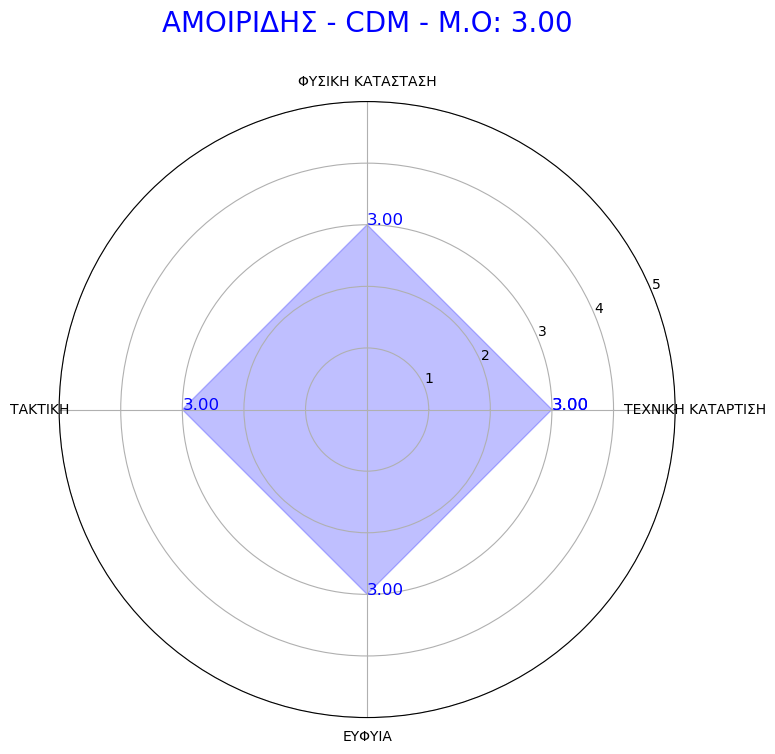

Enter player's name (or 'exit' to quit): ΑΝΑΓΝΩΣΤΟΠΟΥΛΟΣ
Enter the file name for the radar chart (or press Enter for default): ΑΝΑΓΝΩΣΤΟΠΟΥΛΟΣ
Enter the path to save the radar chart (or press Enter for default): C:\Users\anton\Desktop\scouting National team\K-16\Radar Chart for each Player


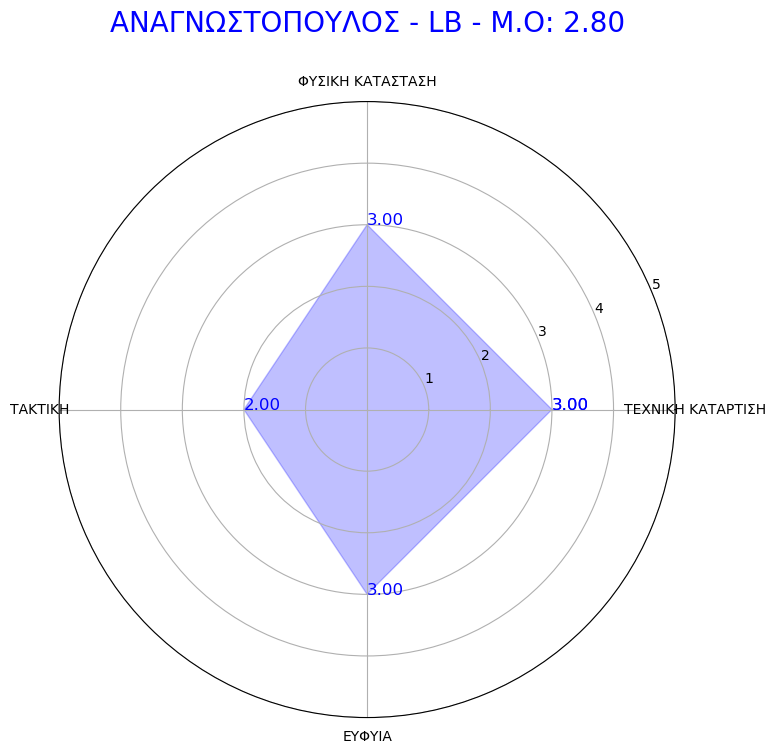

Enter player's name (or 'exit' to quit): ΑΝΑΣΤΑΣΟΠΟΥΛΟΣ
Enter the file name for the radar chart (or press Enter for default): ΑΝΑΣΤΑΣΟΠΟΥΛΟΣ
Enter the path to save the radar chart (or press Enter for default): C:\Users\anton\Desktop\scouting National team\K-16\Radar Chart for each Player


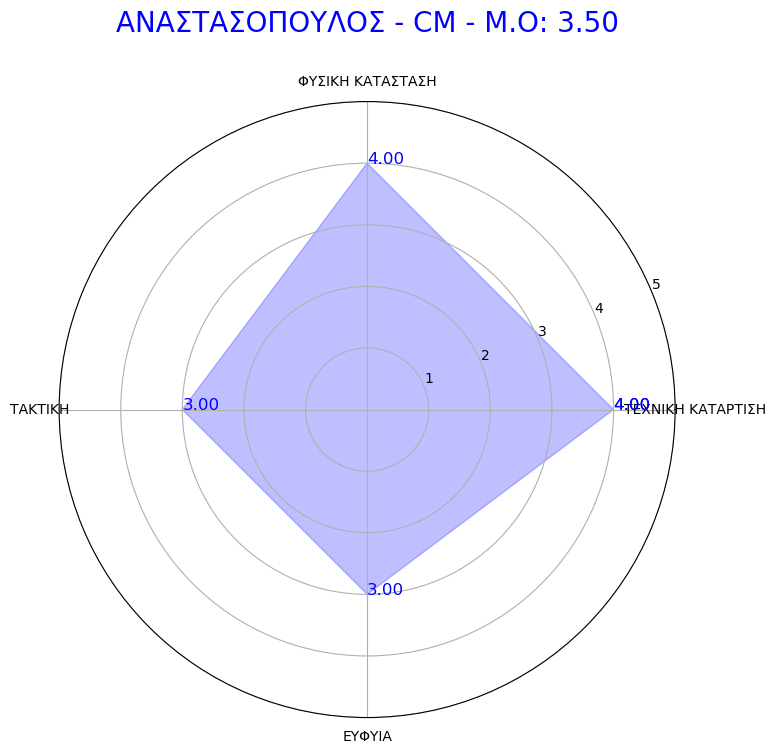

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def create_radar_chart(player_name, file_name, save_path=None):
    # Load the Excel file
    file_path = "C:\\Users\\anton\\Desktop\\scouting National team\\K-16\\RADAR MAP DATA.xlsx"
    df = pd.read_excel(file_path)

    # Extract the attributes for the selected player
    attributes = ['ΤΕΧΝΙΚΗ ΚΑΤΑΡΤΙΣΗ', 'ΦΥΣΙΚΗ ΚΑΤΑΣΤΑΣΗ', 'ΤΑΚΤΙΚΗ', 'ΕΥΦΥIΑ']

    # Display available columns and check for correct column names
    for attribute in attributes:
        if attribute not in df.columns:
            print(f"Warning: Column '{attribute}' not found in DataFrame.")

    # Extract the values for the selected player
    values = df.loc[df['ΕΠΩΝΥΜΟ'] == player_name, attributes].values.flatten().tolist()

    # Get the player's position (ΘΕΣΗ)
    player_position = df.loc[df['ΕΠΩΝΥΜΟ'] == player_name, 'ΘΕΣΗ'].values[0]

    # Get the player's average (Μ.Ο)
    player_average = df.loc[df['ΕΠΩΝΥΜΟ'] == player_name, 'Μ.Ο'].values[0]

    # Number of attributes
    num_attributes = len(attributes)

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_attributes, endpoint=False).tolist()

    # The plot is circular, so we need to "close the loop" by adding the starting data point at the end
    values += values[:1]
    angles += angles[:1]

    # If save_path is provided, use it; otherwise, prompt the user for a path
    if not save_path:
        save_path = input("Enter the path to save the radar chart: ")

    # Ensure the directory in the file path exists
    directory = os.path.dirname(save_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

    # If file_name is provided, use it; otherwise, prompt the user for a file name
    if not file_name:
        file_name = input("Enter the file name for the radar chart: ")

    # Combine the path and file name to create the full file path
    full_file_path = os.path.join(save_path, f"{file_name}.jpg")

    # Create the radar chart with original values
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='b', alpha=0.25)

    # Set the labels for each attribute
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)

    # Set the radial axis ticks
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_yticklabels([1, 2, 3, 4, 5])

    # Add data labels on the chart
    for i, (angle, value) in enumerate(zip(angles, values)):
        ax.text(angle, value, f'{value:.2f}', color='blue', fontsize=12)

    # Add a title with the player's name, position, and average
    plt.title(f"{player_name} - {player_position} - Μ.Ο: {player_average:.2f}", size=20, color='blue', y=1.1)

    # Save the radar chart as JPEG without cropping any letters
    plt.savefig(full_file_path, bbox_inches='tight', dpi=300)

    # Show the radar chart
    plt.show()

# Get player name and save path from user input
while True:
    player_name_input = input("Enter player's name (or 'exit' to quit): ").upper()

    if player_name_input == 'EXIT':
        break

    file_name_input = input("Enter the file name for the radar chart (or press Enter for default): ")
    save_path_input = input("Enter the path to save the radar chart (or press Enter for default): ")
    
    create_radar_chart(player_name_input, file_name_input, save_path=save_path_input)
